In [1]:
# Problem 1
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter


import matplotlib.pyplot as plt

import pandas as pd

import numpy as np
import sqlite3


sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)


winning_query = "SELECT yearID,teamID, (W*1.0/G*1.0 * 100) as winning_percentage FROM Teams WHERE yearID >=1985 GROUP BY yearID,teamID"


payroll_query = "SELECT yearID,teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID,teamID"


# This query is to determine number of players on a team for a particular yearID
number_of_teams = "SELECT yearID,teamID, COUNT(*) as number_of_players FROM Salaries  GROUP BY yearID,teamID"




winning_salaries = pd.read_sql(winning_query, conn)

payroll_salaries = pd.read_sql(payroll_query,conn)

num_teams = pd.read_sql(number_of_teams,conn)

merged = winning_salaries.merge(payroll_salaries,how="left")

merged = merged.merge(num_teams,how="left")


merged.to_csv("mergedd.csv")

merged




,yearID,teamID,winning_percentage,total_payroll,number_of_players
0,1985,ATL,40.740741,14807000.0,22
1,1985,BAL,51.552795,11560712.0,22
2,1985,BOS,49.693252,10897560.0,25
3,1985,CAL,55.555556,14427894.0,28
4,1985,CHA,52.147239,9846178.0,21
...,...,...,...,...,...
853,2014,SLN,55.555556,120693000.0,28
854,2014,TBA,47.530864,72689100.0,25
855,2014,TEX,41.358025,112255059.0,24
856,2014,TOR,51.234568,109920100.0,25


### Information regarding team payroll is empty before the year 1985, so i condensed the dataframe to only include data after 1985. It is nessecary to include information on a teams winning percentage and total payroll to understand trends.

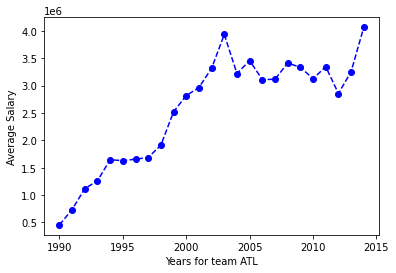

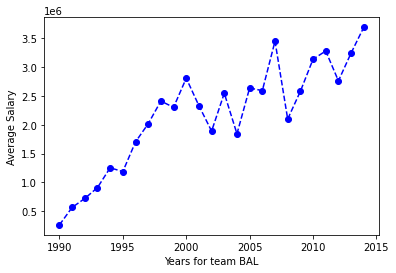

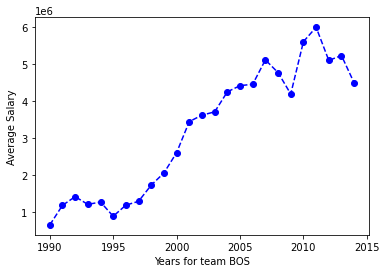

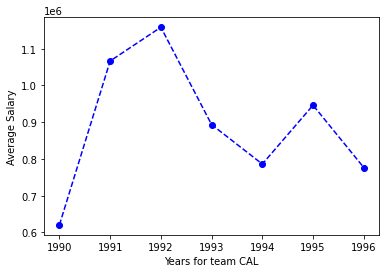

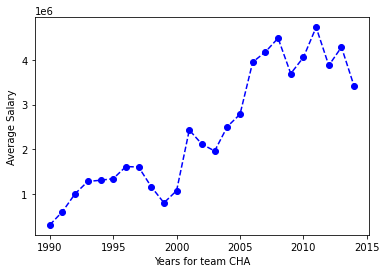

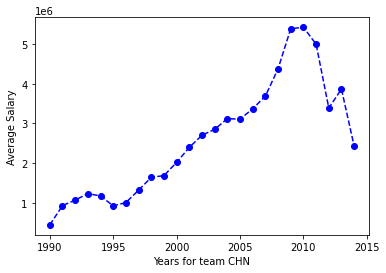

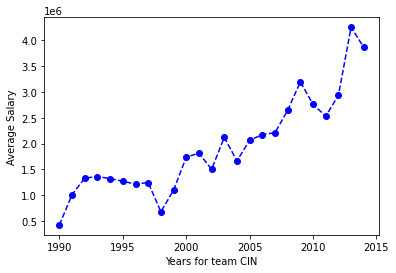

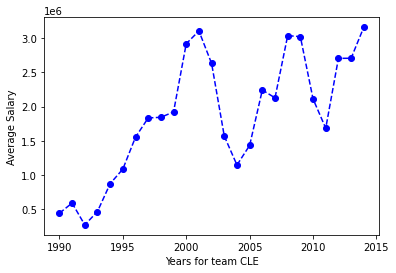

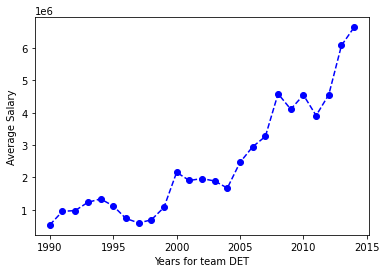

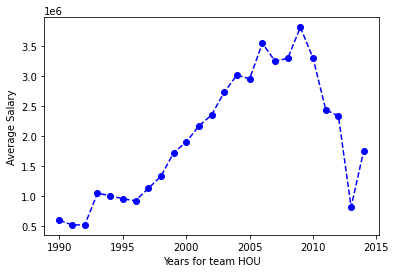

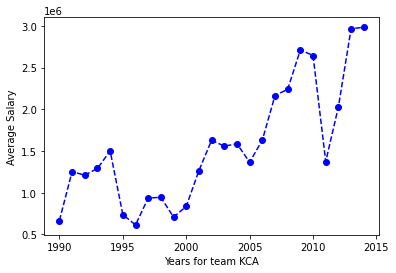

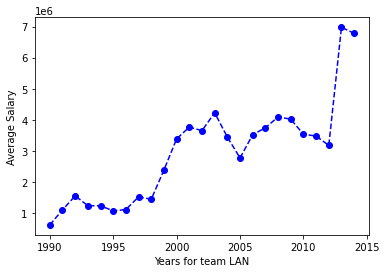

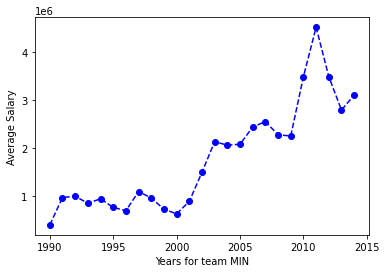

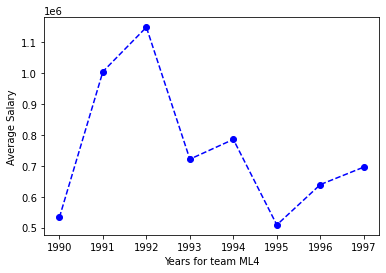

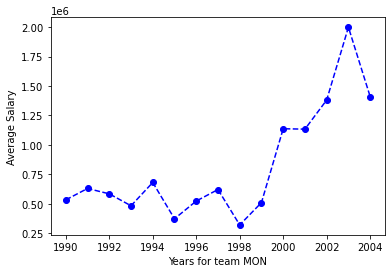

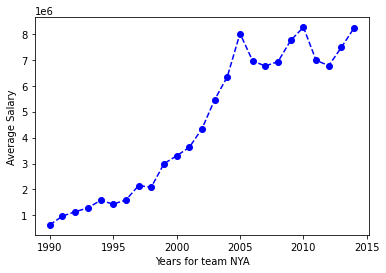

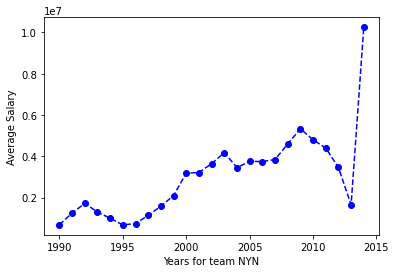

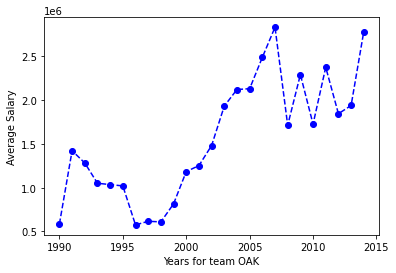

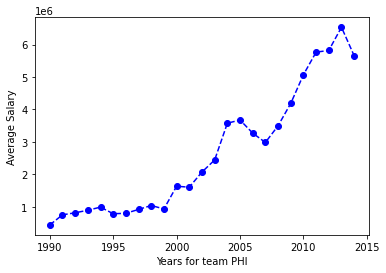

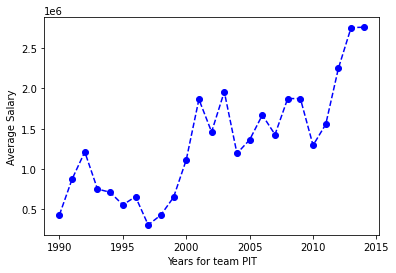

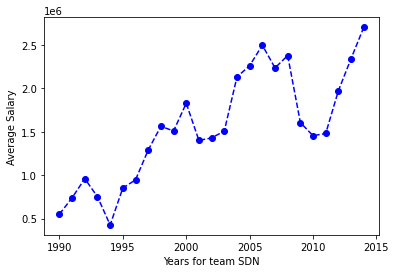

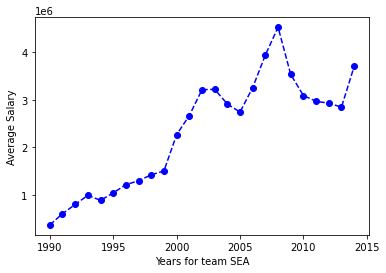

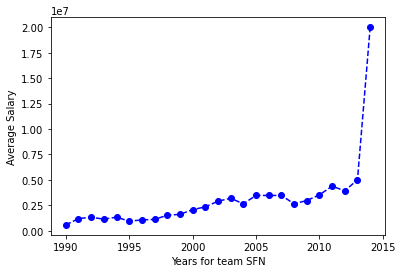

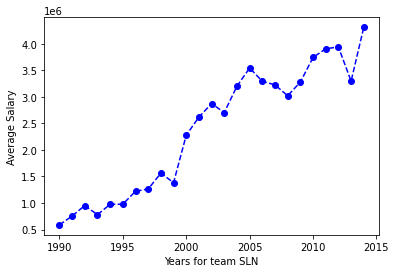

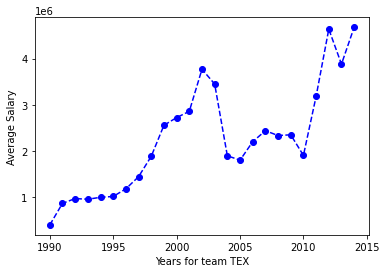

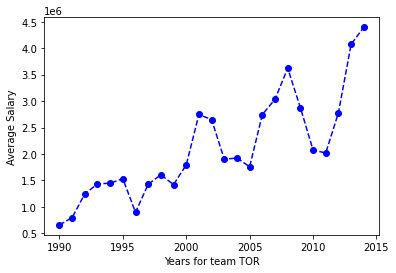

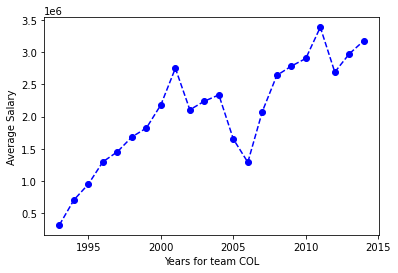

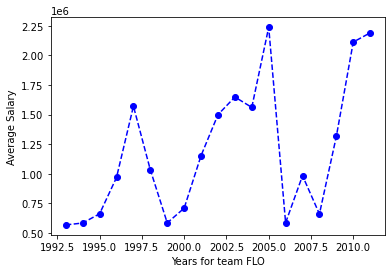

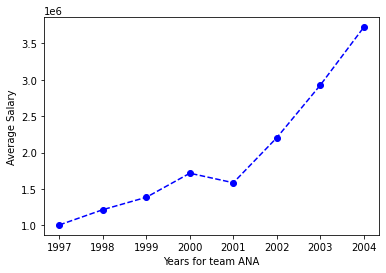

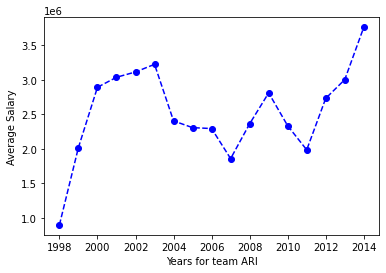

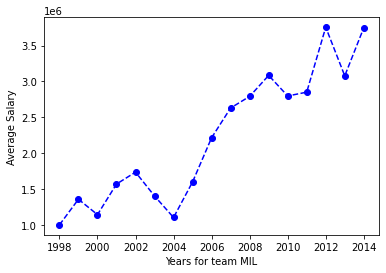

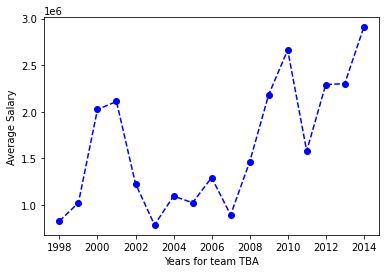

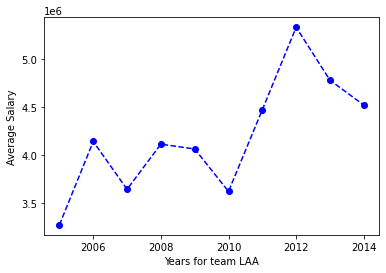

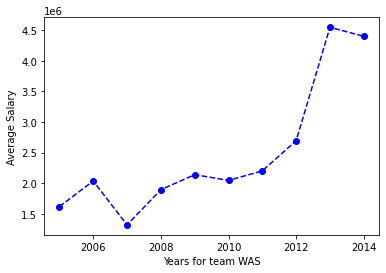

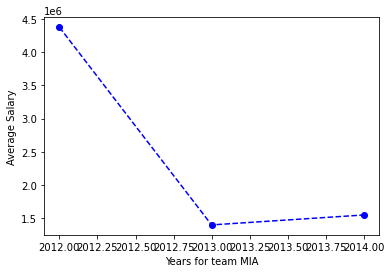

In [2]:

# Average will be total_payroll / total_num_team for each row
# grabbing rows after year 1990 to tidy data 
df = merged.loc[merged['yearID'] >= 1990].copy()

df.index = range(len(df.index))

team_names = df.drop_duplicates(subset=['teamID']).copy()

team_names=team_names['teamID'].copy()

df['average_salary']=df['total_payroll']/df['number_of_players']





def create_plots(team_names,df):
    
    for i in team_names:
        y=i
        team = df.loc[df['teamID']==y].copy()
        plt.figure()
        plt.plot(team.yearID,team.average_salary,'--bo')
        plt.xlabel('Years for team ' + i)
        plt.ylabel('Average Salary')
        plt.show()

    
create_plots(team_names,df)


### The graphs above represent the average salary from years 1990-2014 for each TEAM in baseball

### It appears that the mean of the total payroll for the entire leauge each year increases over time



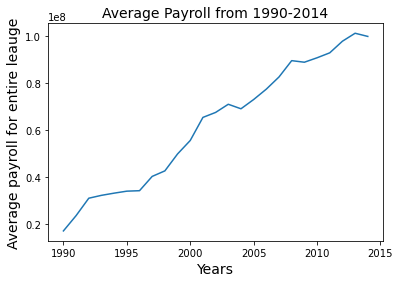

In [3]:
salaries = df.pivot(index='yearID', columns='teamID', values='total_payroll')



average = salaries.mean(axis=1)

plt.plot(average)
plt.title("Average Payroll from 1990-2014",size=14)
plt.xlabel("Years",size=14)
plt.ylabel("Average payroll for entire leauge",size=14)

plt.show()




#df.loc[(df['teamID'] == 'ATL') & (df['yearID'] == 1990)].iloc[0]
#df.loc[(df['teamID'] == 'ATL') & (df['yearID']>=2000)].iloc[0]


###  Graphing the average payrolls confirms my statement that the average payroll increases over time

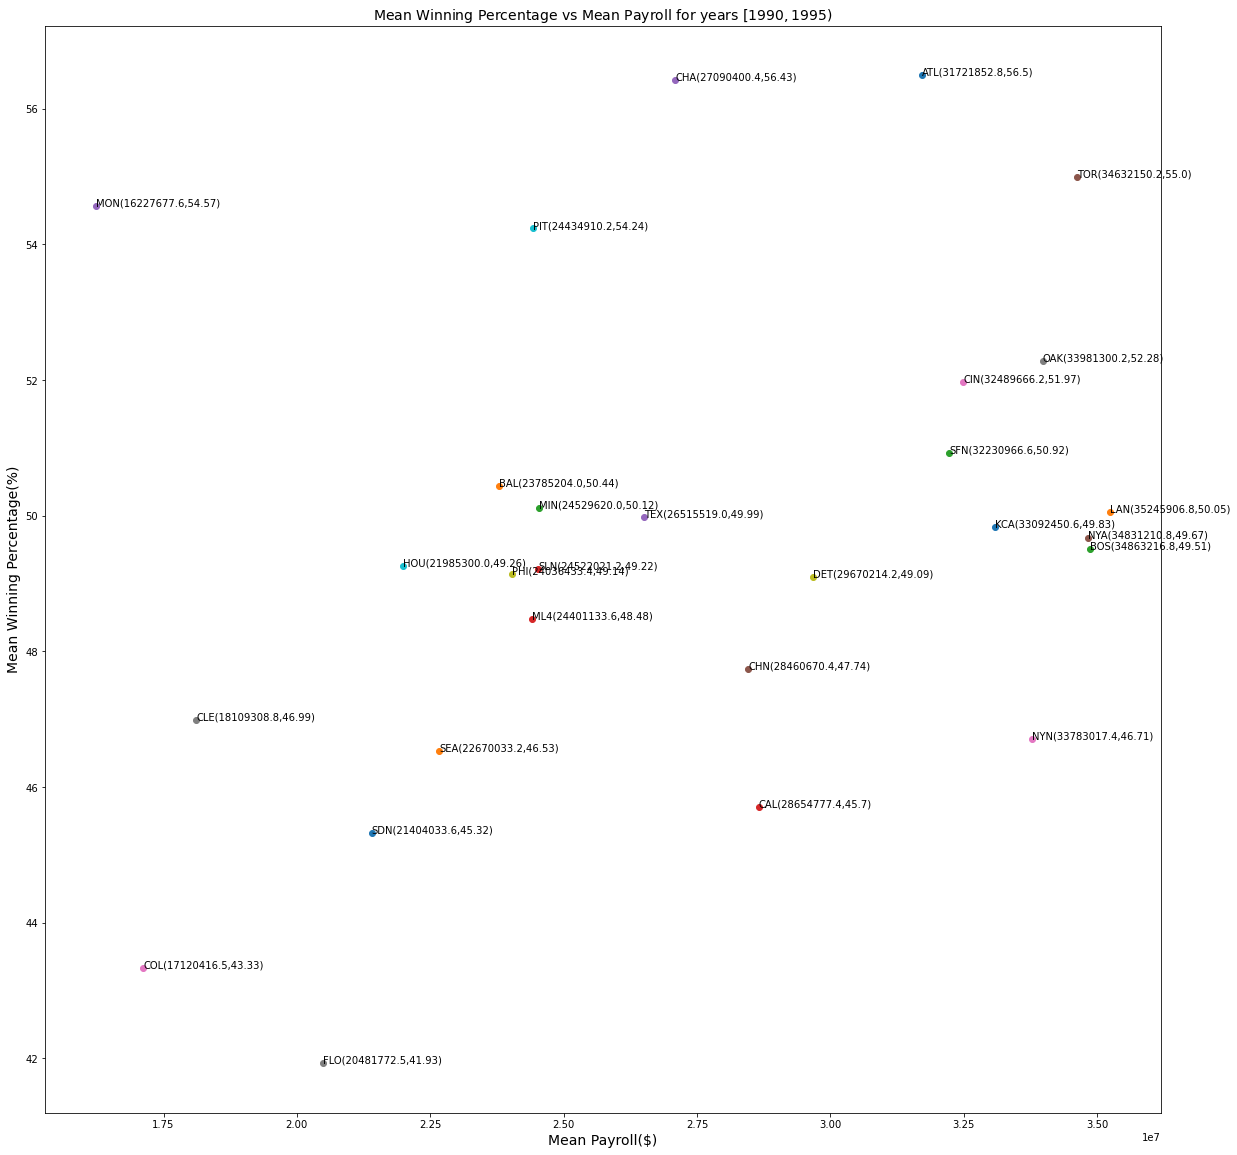

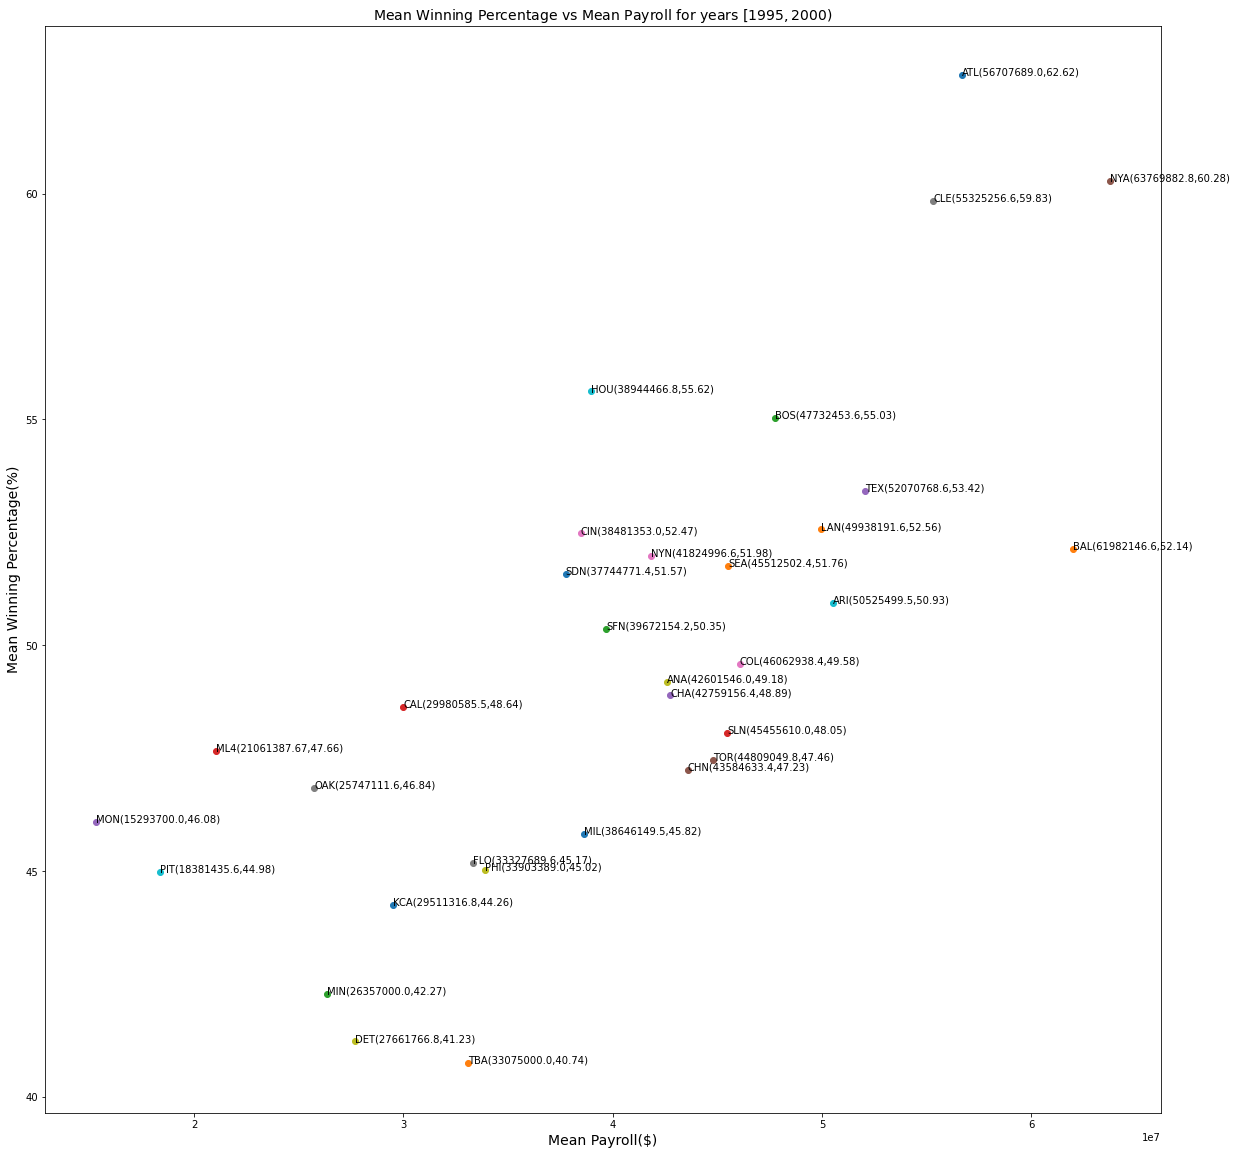

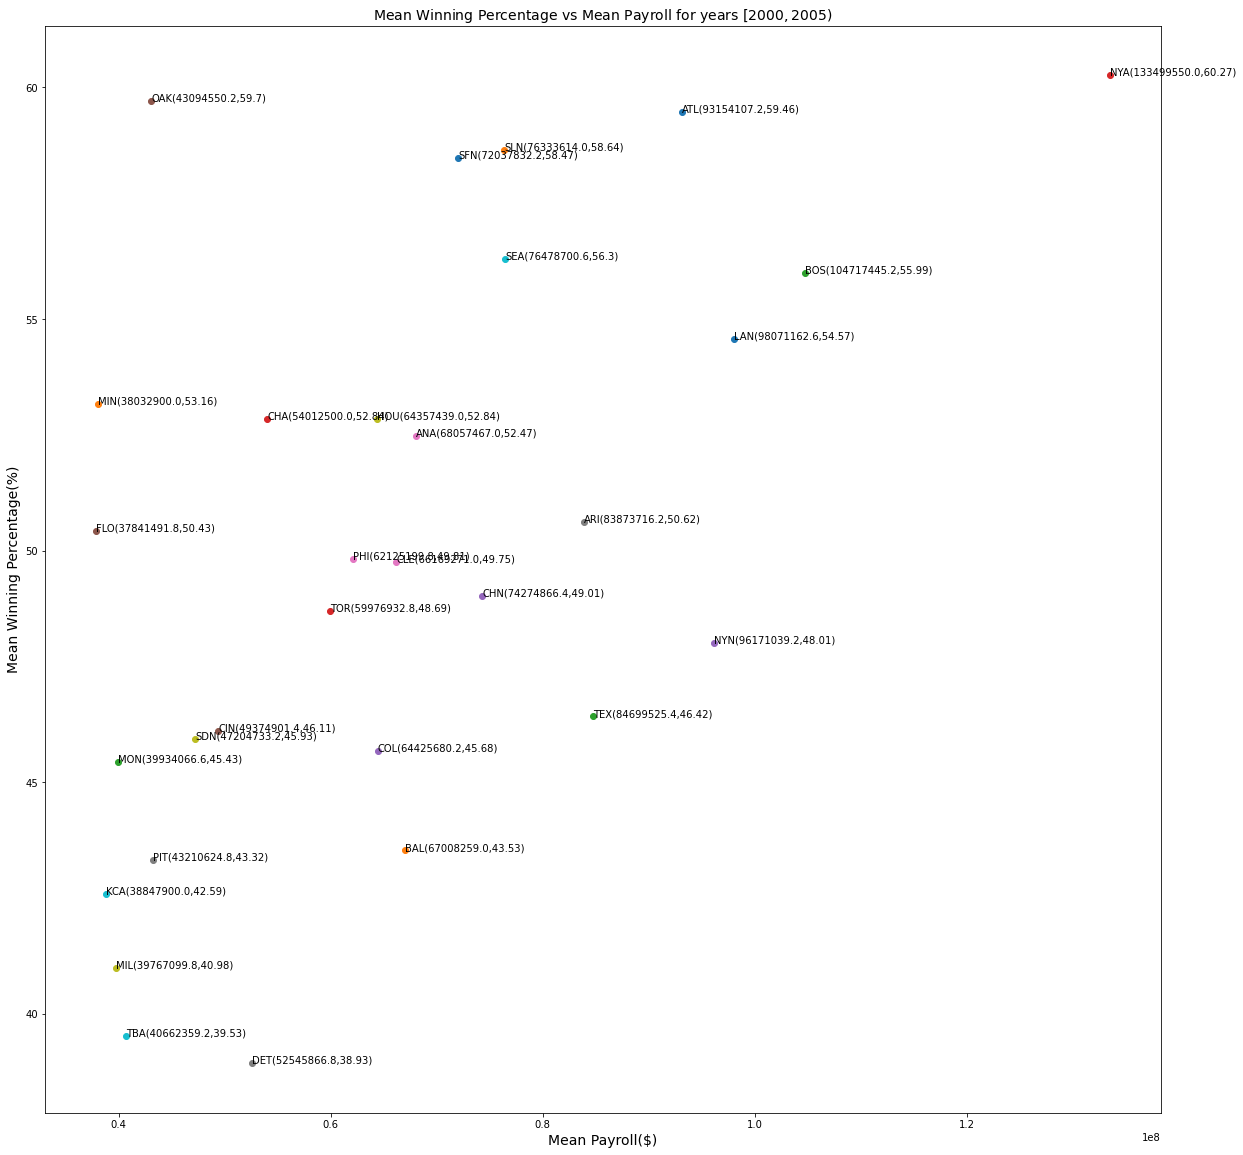

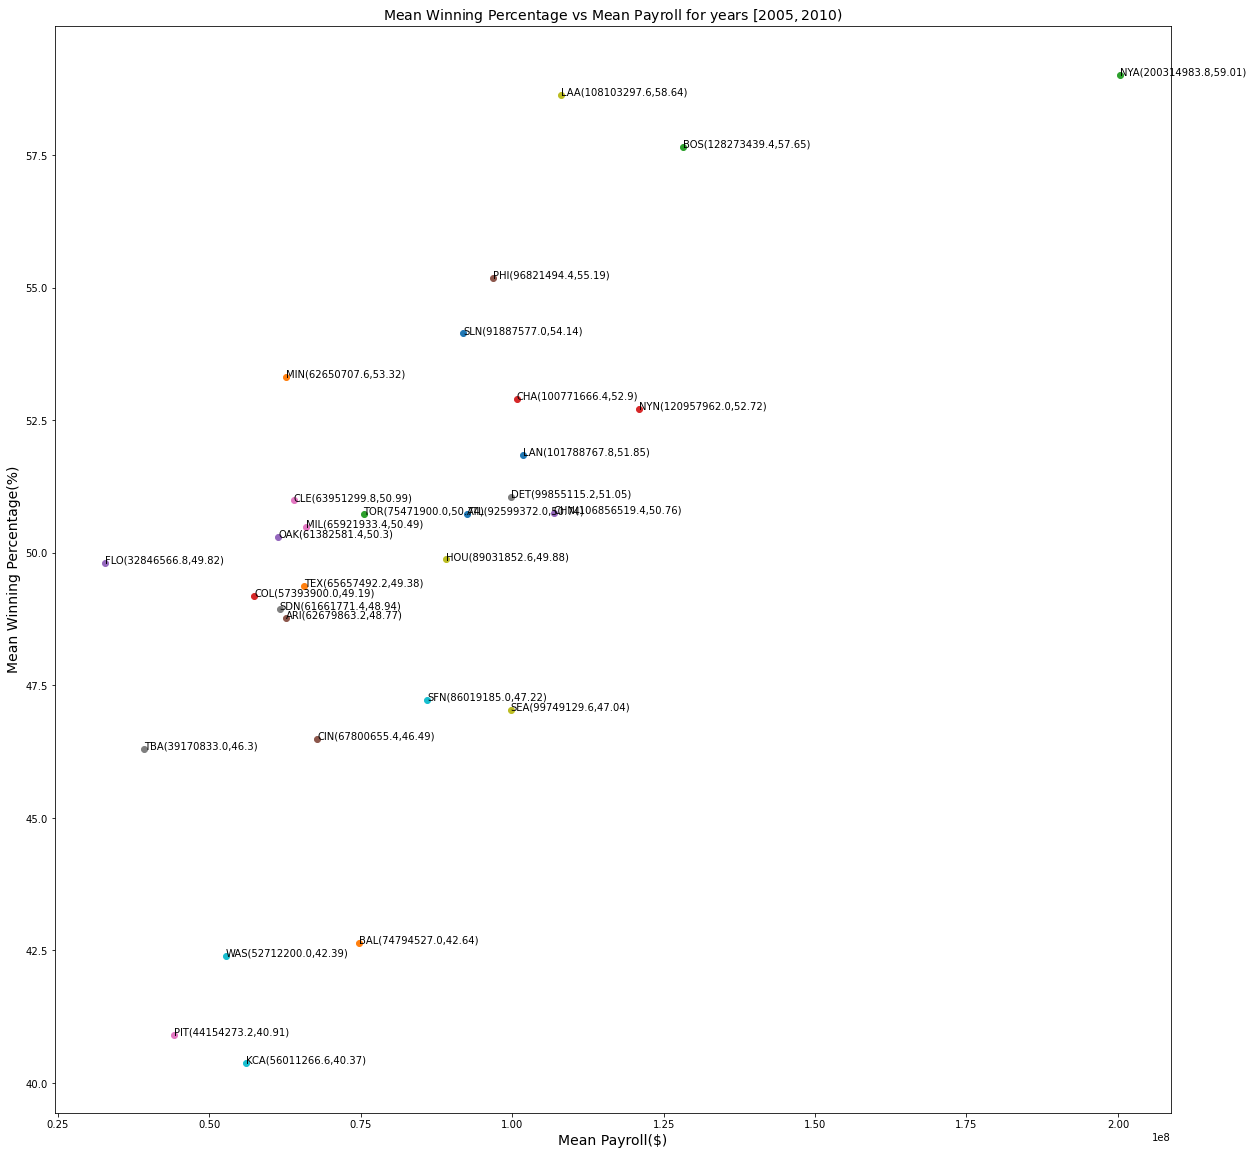

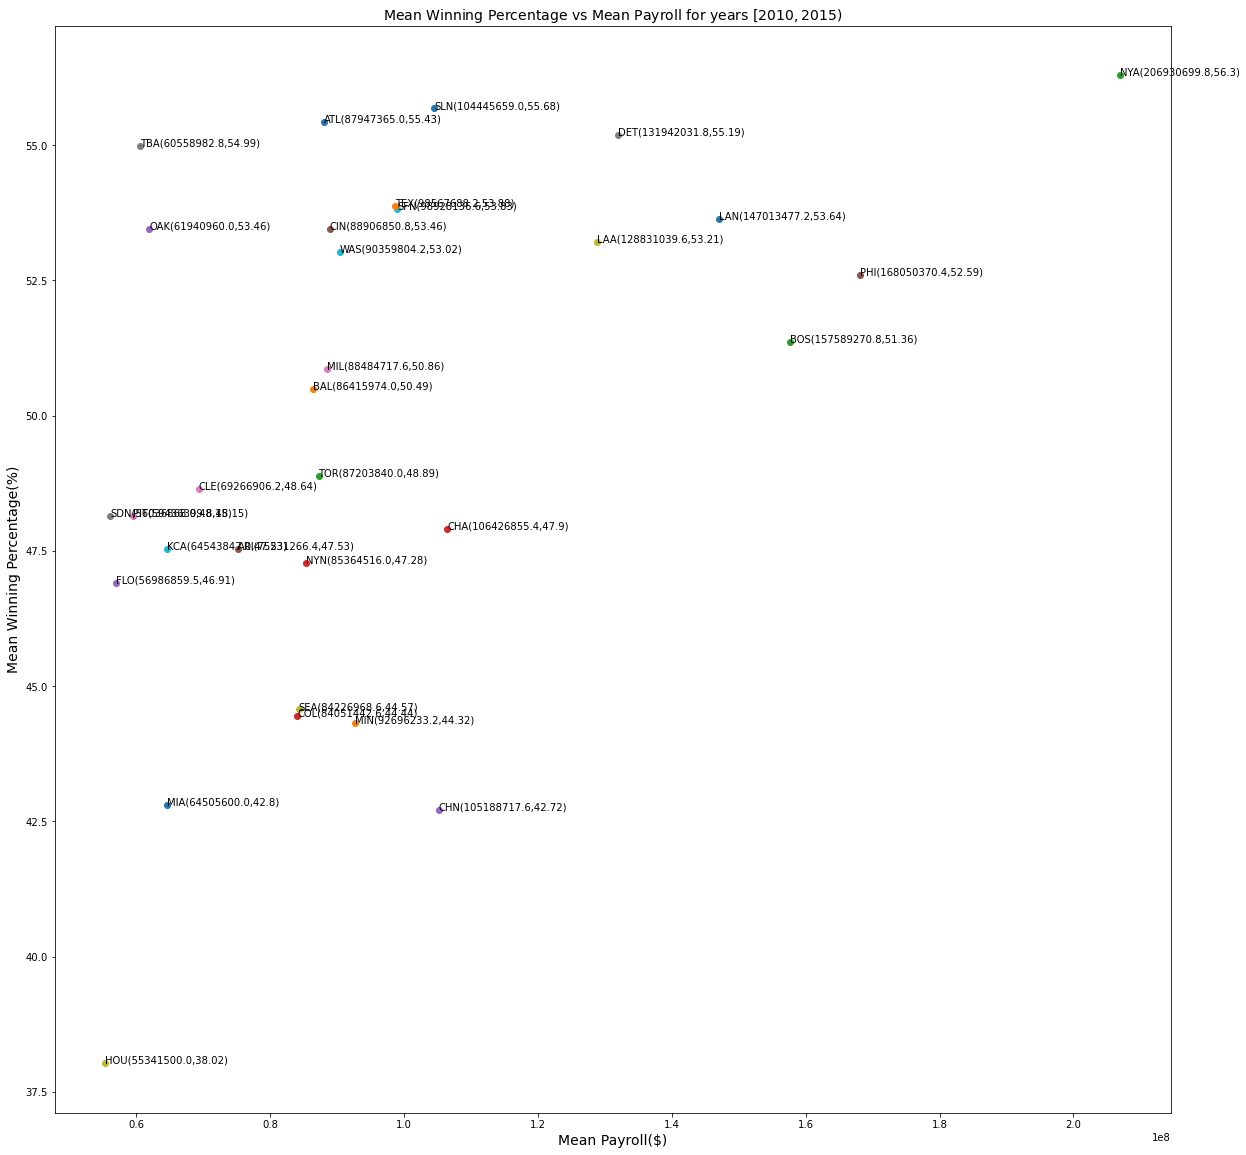

In [4]:


bins = [1990,1995,2000,2005,2010,2015]
group_names =["Year 1", "Year 2", "Year 3","Year 4","Year 5"]


df['time_period']=pd.cut(df['yearID'],bins,labels=group_names,right=False)

def scatter_time_periods(group_names,df,team_names,bins):
    for i in range(len(group_names)):
        plt.figure(figsize=(20,20))
        for j in team_names:
            x = df.loc[(df['time_period']==group_names[i]) & (df['teamID']==j)].total_payroll.mean()

            y= df.loc[(df['time_period']== group_names[i]) & (df['teamID']==j)].winning_percentage.mean()
                 
            # there are some nan values for some teams so im preventing that from messing up the scatter plots
            if(x==x and y==y):
                plt.scatter(x,y)
                plt.title(f"Mean Winning Percentage vs Mean Payroll for years [${bins[i]},${bins[i+1]})",size=14)
                plt.text(x,y,j + "(" + str(round(x,2)) +"," + str(round(y,2)) +")")
                plt.xlabel("Mean Payroll($)",size=14)
                plt.ylabel("Mean Winning Percentage(%)",size=14)
                
                
            
         
           
        plt.show()
            
          
            
        
            
            
            
            
        
scatter_time_periods(group_names,df,team_names,bins)







## The scatter plots above illustrates mean winning percentage vs mean payroll for five different time periods for each team.

## Analyzing the plots show that the spread became wider. 

## Some teams that stand out as being good at paying for wins include NYA, BOS,and ATL. NYA in particular has consistently demonstrated high win percentages in corrolation to a large mean payroll across each time period. 



## Oakland A's mean payrolls across the time periods has appeared to increase but are still low compared to the rest of the leauge. Despite this, they have managed to have an above average winning percentage across each time period in comparison to the rest of the leauge. This is very evident from the years 2000-2015. This indicates that Oakland has a high spending efficiency compared to other pay-to-win teams like NYA because of a low mean payroll and high winning percentage. 

## Oaklands mean payroll and winning percentage for each time period
1990-1995: ($34,632,150, 52.28%)

1995-2000: ($25,747,111, 46.84%)

2000-2005: ($43,094, 550,59.7%)

2005-2010: ($61,382, 581,50.3%)

2010-2015: ($61,940,960, 53.46%)



In [5]:
x = []

y= []

z=[]

years=df['yearID']

teams= df['teamID']


for i in years:
    x.append(df.loc[df['yearID']==i].total_payroll.mean())
    y.append(np.std(df.loc[df['yearID']==i].total_payroll))



In [6]:
for j, year in df.groupby('yearID'):
    s = year['total_payroll'].std() 
    avgPay = year['total_payroll'].mean()
    
    for i, team in year.groupby('teamID'):
        stdPay = (team['total_payroll'] - avgPay) / s
        df.loc[(df['yearID']==j) & (df['teamID']==i),'standard_payroll'] = stdPay
        
df

,yearID,teamID,winning_percentage,total_payroll,number_of_players,average_salary,time_period,standard_payroll
0,1990,ATL,40.123457,14555501.0,32,4.548594e+05,Year 1,-0.667275
1,1990,BAL,47.204969,9680084.0,37,2.616239e+05,Year 1,-1.959861
2,1990,BOS,54.320988,20558333.0,32,6.424479e+05,Year 1,0.924213
3,1990,CAL,49.382716,21720000.0,35,6.205714e+05,Year 1,1.232198
4,1990,CHA,58.024691,9491500.0,31,3.061774e+05,Year 1,-2.009859
...,...,...,...,...,...,...,...,...
723,2014,SLN,55.555556,120693000.0,28,4.310464e+06,Year 5,0.457126
724,2014,TBA,47.530864,72689100.0,25,2.907564e+06,Year 5,-0.593171
725,2014,TEX,41.358025,112255059.0,24,4.677294e+06,Year 5,0.272509
726,2014,TOR,51.234568,109920100.0,25,4.396804e+06,Year 5,0.221422


### Creating a new column in my data frame for a standardized payroll. 

### Standard Payroll = payroll for a team i in year j - average payroll in year j / standard deviation of payroll for year j

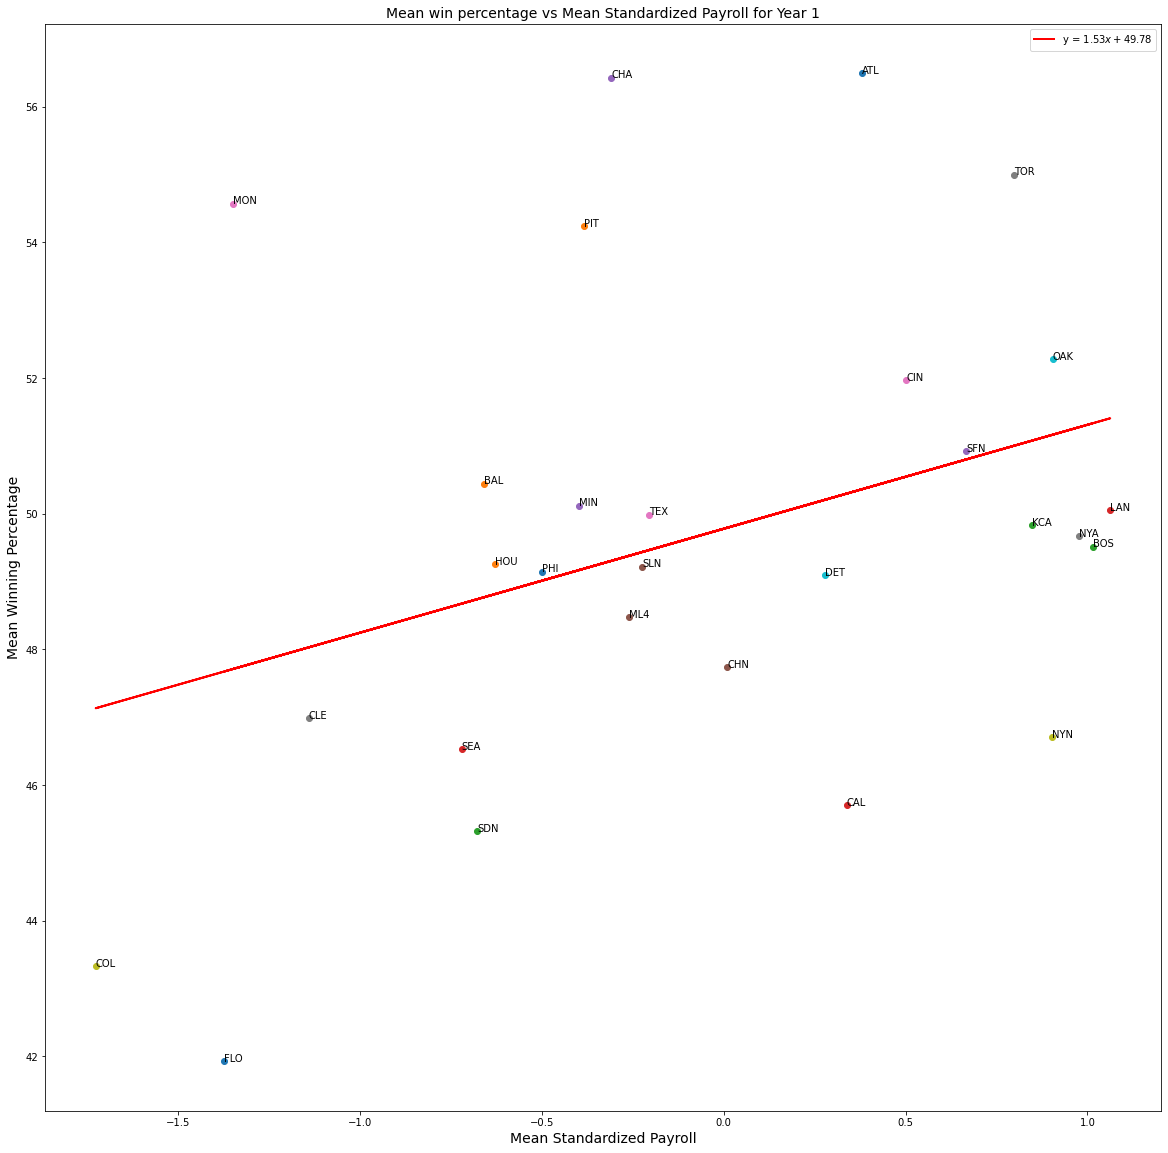

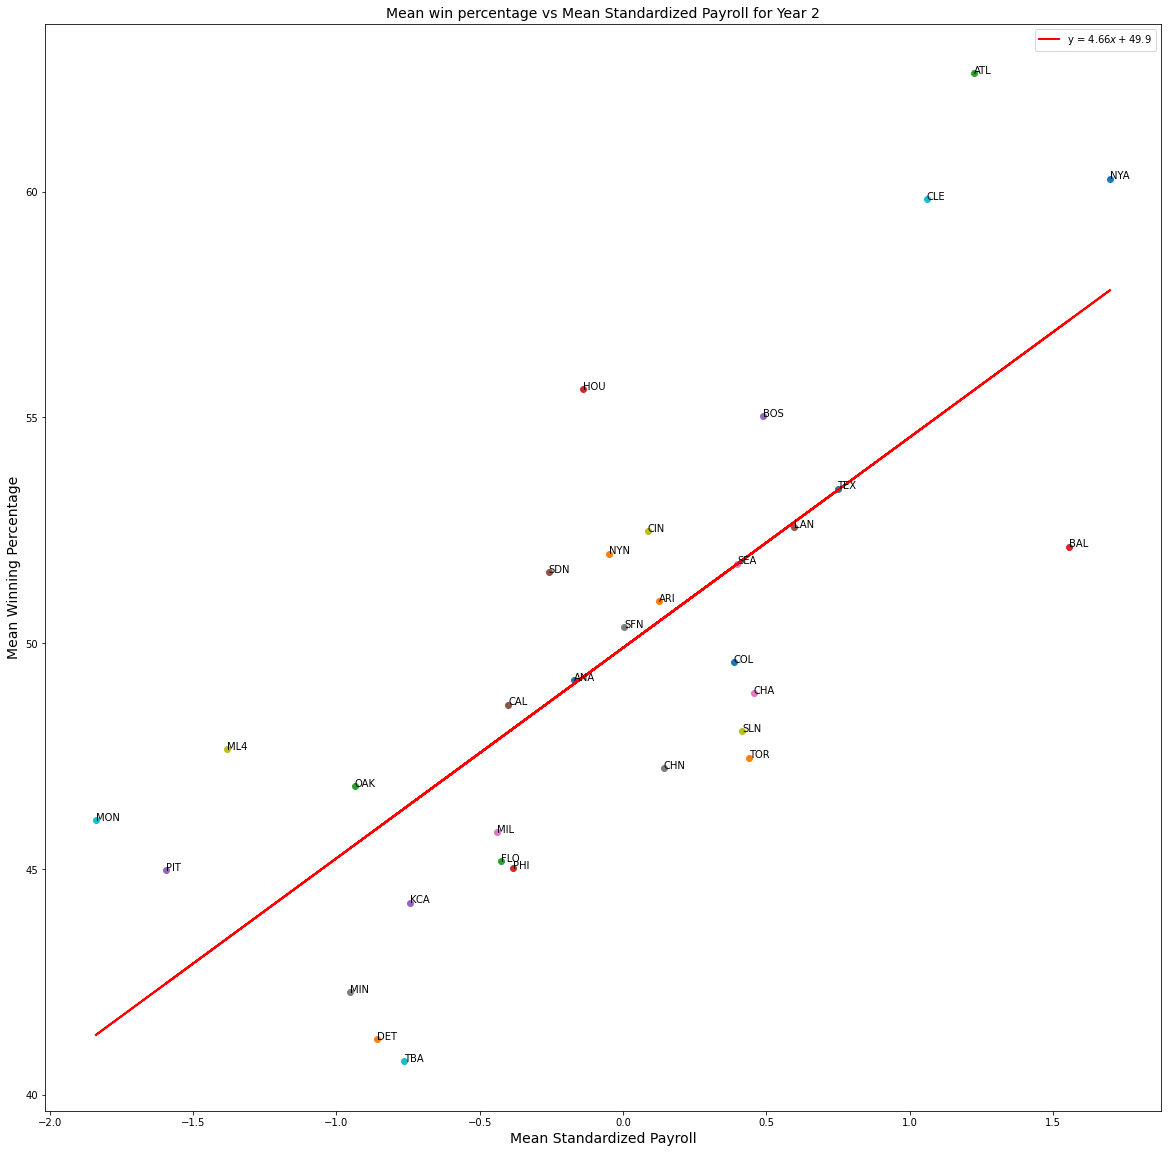

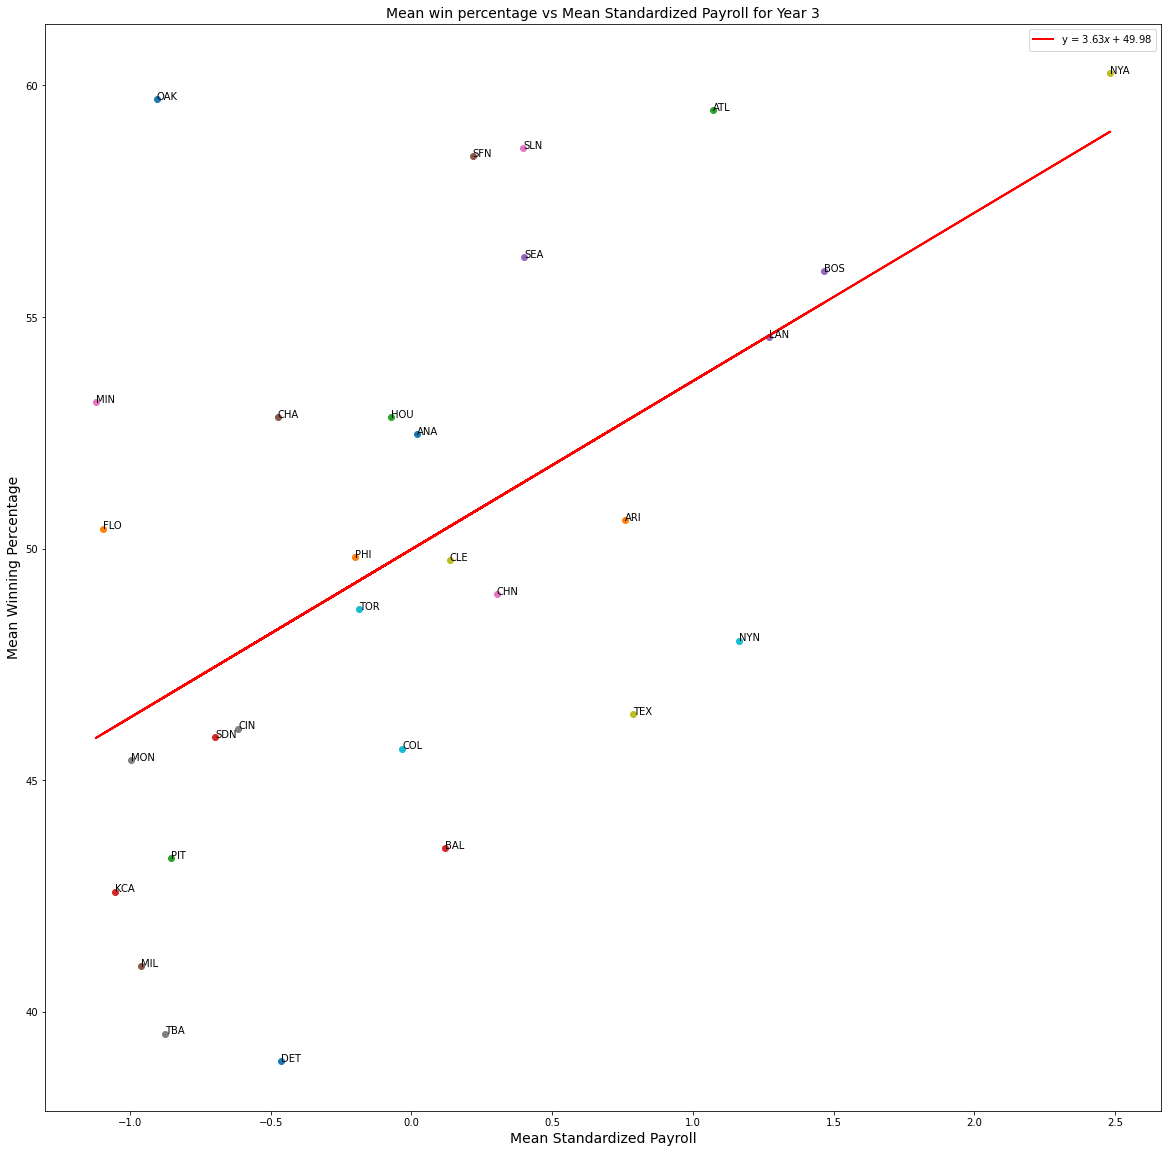

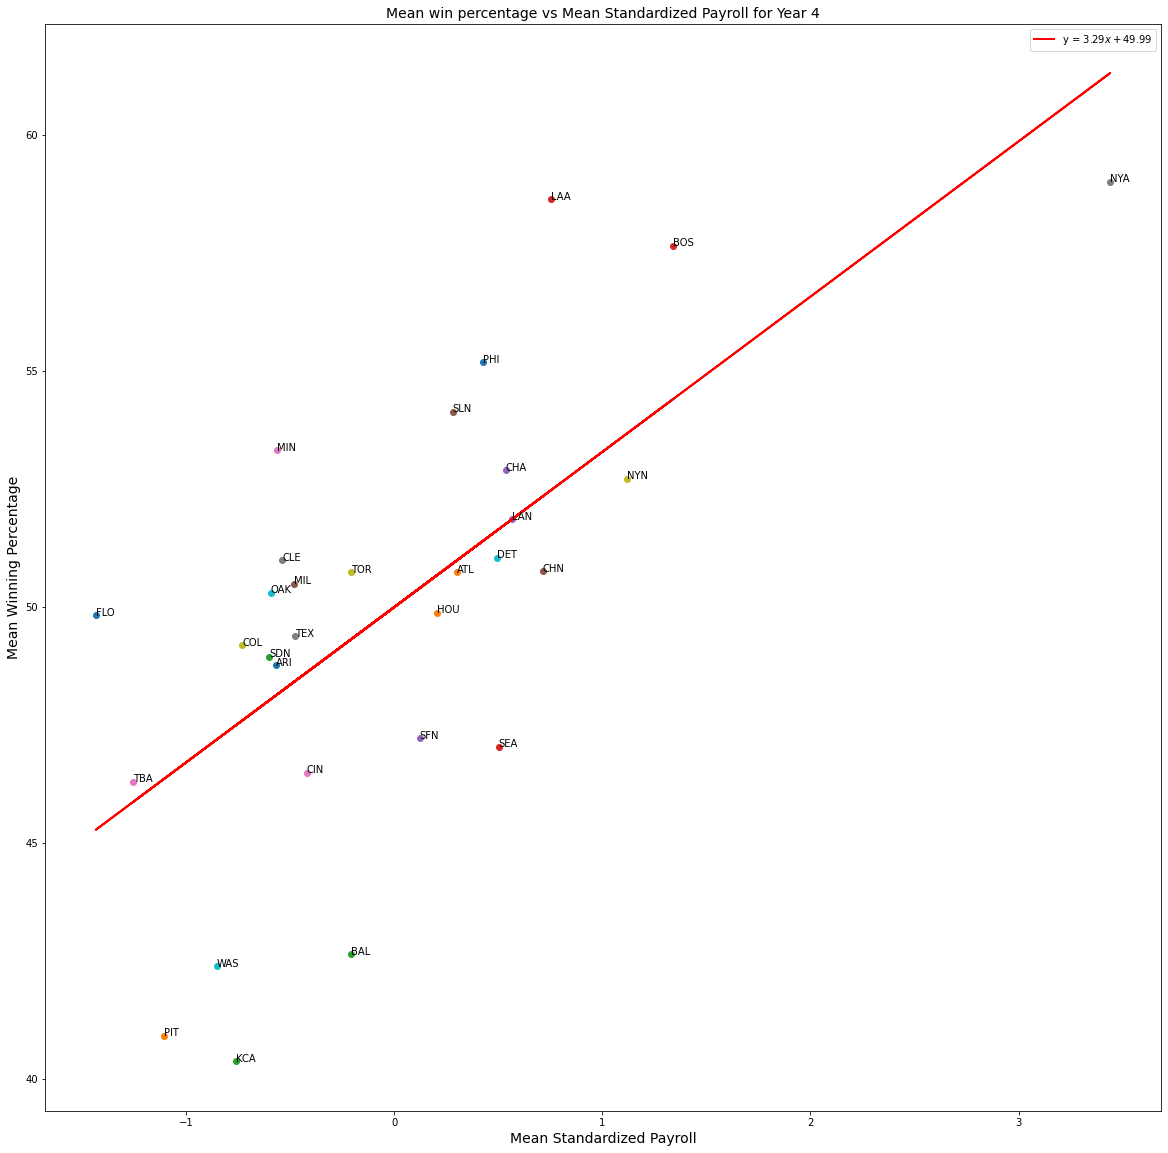

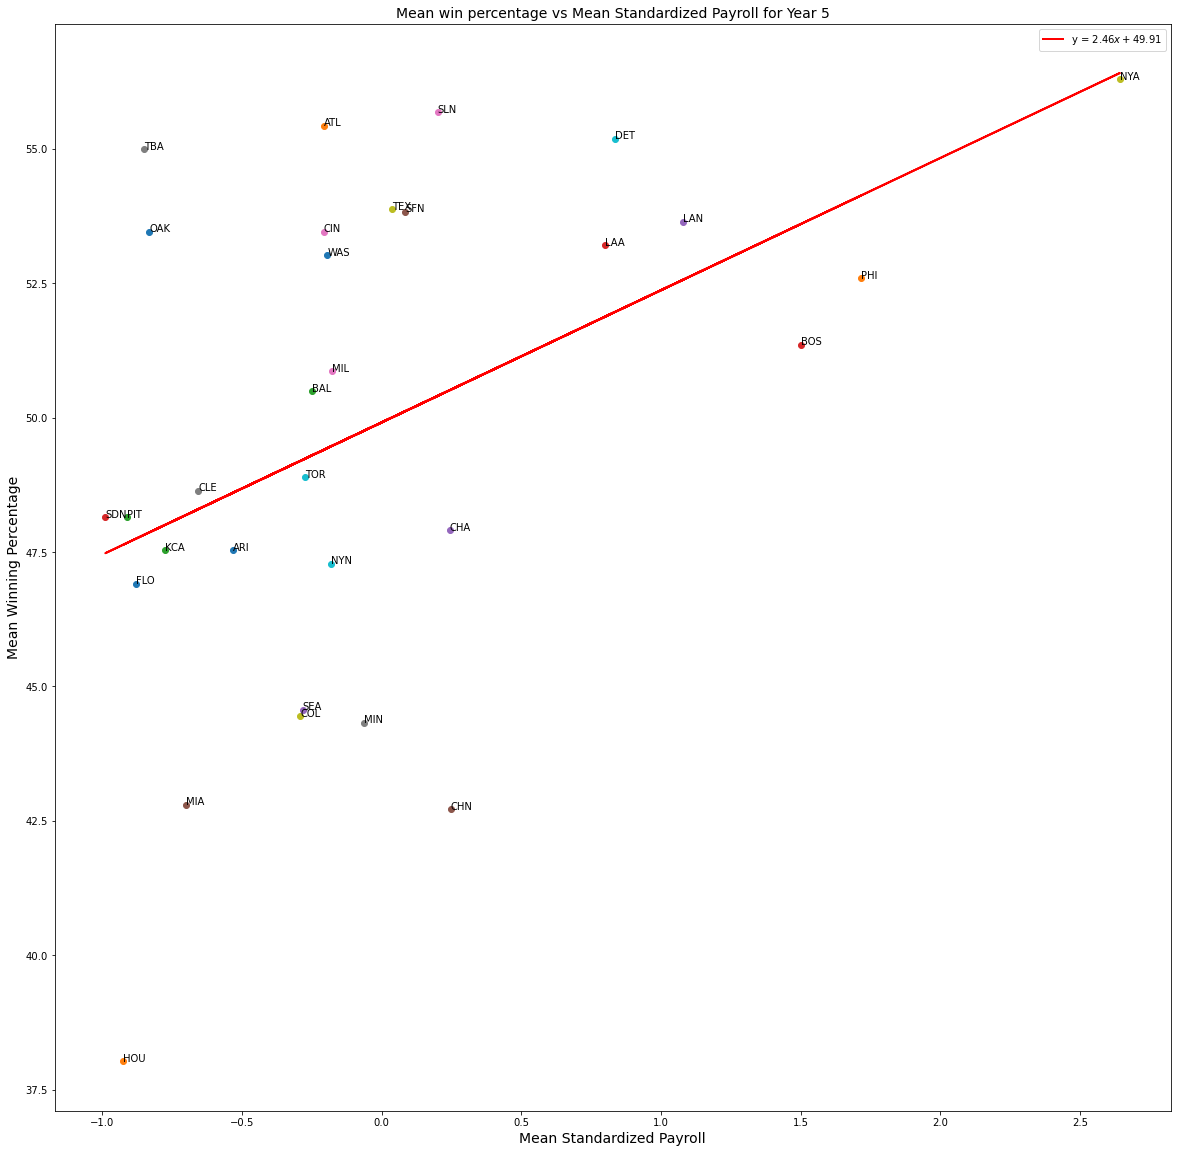

In [7]:
bins = [1990,1995,2000,2005,2010,2015]
group_names =["Year 1", "Year 2", "Year 3","Year 4","Year 5"]


df['time_period']=pd.cut(df['yearID'],bins,labels=group_names,right=False)



for i,time in df.groupby('time_period'):
    x_1 = []

    y_1 = []

    plt.figure(figsize=(20,20))

    for j,team in time.groupby('teamID'):
        
        y=team.winning_percentage.mean()
        y_1.append(y)
        
        
        x=team.standard_payroll.mean()
        x_1.append(x)
        
        plt.scatter(x,y)
        plt.text(x,y,j)
        

    
        
        
    #print(plt.xticks.values)
    plt.title(f"Mean win percentage vs Mean Standardized Payroll for {i}",size=14)
    plt.xlabel("Mean Standardized Payroll",size=14)
    plt.ylabel("Mean Winning Percentage",size=14)
    
    

    m = np.polyfit(x_1, y_1, 1)
    b=m[1]
    m=m[0]
    plt.plot(x_1, np.multiply(m, x_1) + b, '-', c='red', lw=2, label=f"y = ${round(m,2)}x + ${str(round(b,2))}")
    plt.legend()
    
    
    
    
    
    plt.show()
        

            





### The above plots represent a teams winning percentage and mean standard payroll for a time period

### The linear regression can help find relationship between the independent and dependent clauses

### Calculating the standard payroll allowed me to rescale the data so that the distribution can be a normal distribution.

### The previous plots before the new standard payroll column demonstrates a smaller spread for total payroll compared to these new plots. The spread is now larger and wider horizontally 








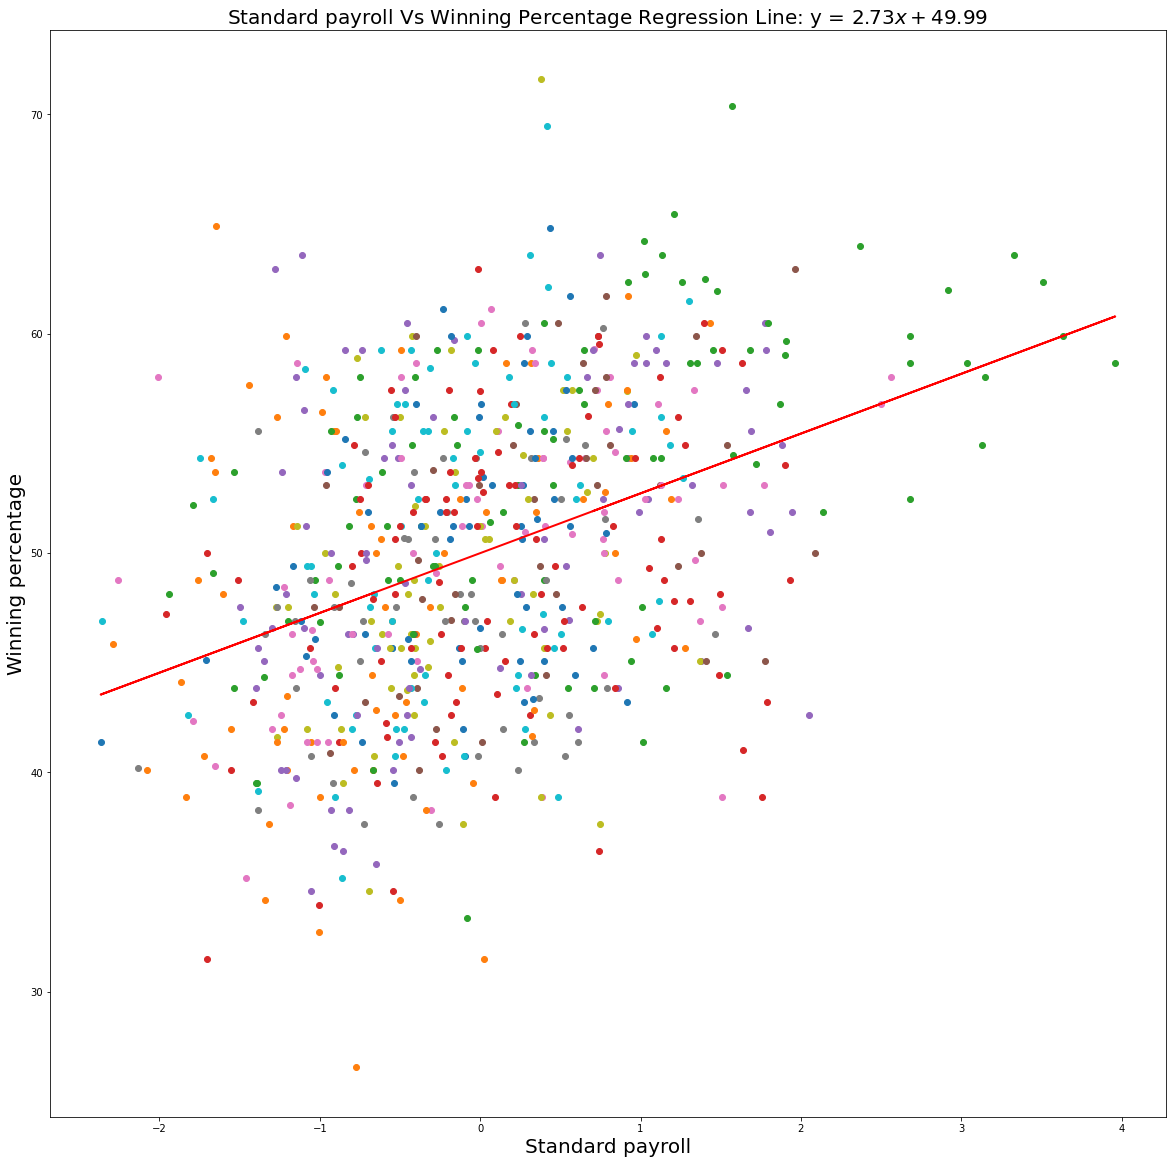

In [8]:
plt.figure(figsize=(20,20))

# scattering every team from every year 
for i,team in df.groupby('teamID'):
    #print(i,team)
    plt.scatter(team['standard_payroll'],team['winning_percentage'])
    
    
    
m=np.polyfit(df['standard_payroll'],df['winning_percentage'],1)
b=m[1]

m=m[0]

X =df['standard_payroll']


y = np.multiply(m,X) + b

plt.plot(X,y,color='red',label='Regression line',lw=2)
plt.xlabel("Standard payroll",size=20)
plt.ylabel("Winning percentage",size=20)
plt.title(f"Standard payroll Vs Winning Percentage Regression Line: y = ${round(m,2)}x + ${round(b,2)}",size=20)
plt.show()



### The regression line shows that teams spend roughly the average payroll in a given year and will win 50% of their games, and teams increase 5% wins for every 2 standard units of payroll. These results have now given me an expected winning percentage for a team in a particular year.

In [9]:
plt.figure(figsize=(20,20))

# scattering every team from every year 
for i,team in df.groupby('teamID'):
    for j,year in team.groupby('yearID'):
        x = year['winning_percentage'] - (50 + 2.5 * year['standard_payroll'])
        df.loc[(df['yearID']==j) & (df['teamID']==i),'efficiency']=x
       
df

,yearID,teamID,winning_percentage,total_payroll,number_of_players,average_salary,time_period,standard_payroll,efficiency
0,1990,ATL,40.123457,14555501.0,32,4.548594e+05,Year 1,-0.667275,-8.208354
1,1990,BAL,47.204969,9680084.0,37,2.616239e+05,Year 1,-1.959861,2.104621
2,1990,BOS,54.320988,20558333.0,32,6.424479e+05,Year 1,0.924213,2.010454
3,1990,CAL,49.382716,21720000.0,35,6.205714e+05,Year 1,1.232198,-3.697779
4,1990,CHA,58.024691,9491500.0,31,3.061774e+05,Year 1,-2.009859,13.049338
...,...,...,...,...,...,...,...,...,...
723,2014,SLN,55.555556,120693000.0,28,4.310464e+06,Year 5,0.457126,4.412740
724,2014,TBA,47.530864,72689100.0,25,2.907564e+06,Year 5,-0.593171,-0.986208
725,2014,TEX,41.358025,112255059.0,24,4.677294e+06,Year 5,0.272509,-9.323248
726,2014,TOR,51.234568,109920100.0,25,4.396804e+06,Year 5,0.221422,0.681014


<Figure size 1440x1440 with 0 Axes>

### Created a new column in my data frame that computes the spending efficiency of each team each year 

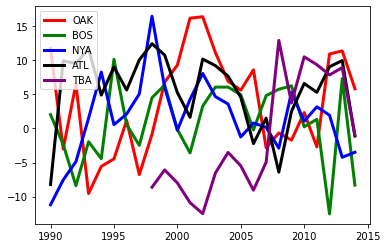

In [10]:
teams=['OAK','BOS','NYA','ATL','TBA']
colors=['red','green','blue','black','purple']

j=0

pivot = df.pivot(index='yearID', columns='teamID', values='efficiency')

for i in teams:
    plt.plot(pivot[i],label=i,lw=3,color=colors[j])
    j+=1
    plt.legend()

### The plot above represents the efficiency of five teams from 1990-2014. We derived an efficiency formula and visually graphed how a teams efficiency changes over the years. 


### From this plot i can learn how the efficiency of the most dominant teams has changed over the years. It can help answer questions about a teams efficiency.

### Oaklands efficiency during period compared to other dominant teams in the MLB has remained competively within the same ranges.

### Overall, this analysis has taught me that the pay to win narrative is not always true and that there are examples of teams that have dominated the leauge with payrolls much shorter than richer teams. Oakland in particular is a prime example of this 
